In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
dataset_sales= pd.read_csv("supermarket_sales - Sheet1.csv")
dataset_sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [6]:
print(len(dataset_sales))#mengcek banyak record

1000


In [5]:
#training data 
data_train = dataset_sales [['Unit price','Quantity','Tax 5%','Total']][:70] 
label_train = dataset_sales ['Gender'][:70]

#testing data
data_test = dataset_sales [['Unit price','Quantity','Tax 5%','Total']][:-30] 
label_test = dataset_sales ['Gender'][:-30]

In [7]:
#untuk memeriksa panjang data yang di pisahkan
print(f'data train len: {len(data_train)}',
      f'label train len : {len(label_train)}',
      f'data test len : {len(data_test)}',
     f'label test len : {len(label_test)}',
      f'dataset len : {len(dataset_sales)}',
      sep='\n')

data train len: 70
label train len : 70
data test len : 970
label test len : 970
dataset len : 1000


In [8]:
from sklearn.preprocessing import StandardScaler    
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
dataset_normal = dataset_sales.copy() 

In [10]:
scaler = MinMaxScaler() 

In [13]:
normal = scaler.fit_transform(dataset_normal[['Unit price','Quantity','Tax 5%','Total']])#untuk skala data
normal = pd.DataFrame(normal) #untuk normalisasi data
normal.rename(columns={0:'Unit price',1:'Quantity',2:'Tax 5%',3:'Total'}, inplace=True)# untuk menganti nama label
normal.head(5)

,Unit price,Quantity,Tax 5%,Total
0,0.718847,0.666667,0.521616,0.521616
1,0.057855,0.444444,0.067387,0.067387
2,0.403316,0.666667,0.319628,0.319628
3,0.535603,0.777778,0.463549,0.463549
4,0.848131,0.666667,0.604377,0.604377


Text(0, 0.5, 'Total')

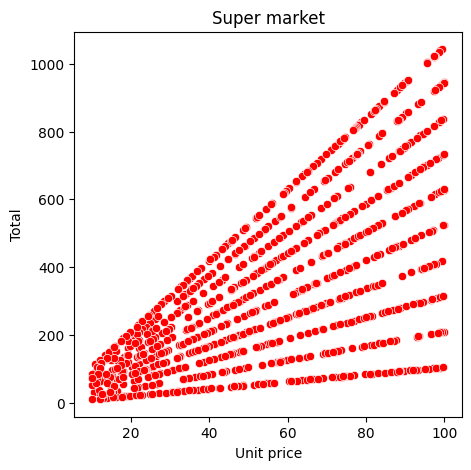

In [14]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(dataset_normal, x='Unit price', y='Total', color='red')
plt.title('Super market')
plt.xlabel('Unit price')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

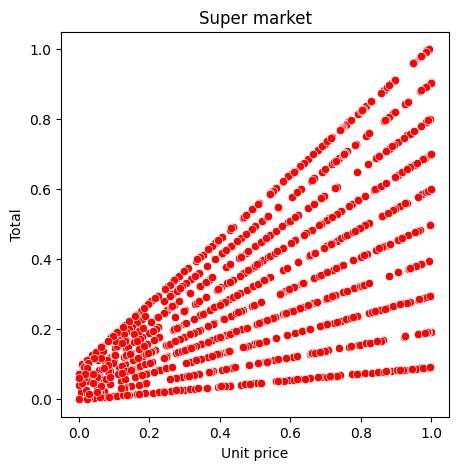

In [15]:
plt.figure(1, figsize=(5,5))
sns.scatterplot(normal, x='Unit price', y='Total', color='red')
plt.title('Super market')
plt.xlabel('Unit price')
plt.ylabel('Total')

In [16]:
dataset_standar = dataset_sales.copy() 

In [17]:
standar = StandardScaler()

In [18]:

# standarisasi process
scaled_data = standar.fit_transform(dataset_sales[['Unit price','Quantity','Tax 5%','Total']])

In [19]:
np.std(dataset_sales)

c:\Users\MID\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Unit price                  26.481378
Quantity                     2.921969
Tax 5%                      11.702970
Total                      245.762362
cogs                       234.059392
gross margin percentage      0.000000
gross income                11.702970
Rating                       1.717721
dtype: float64

In [20]:
np.std(scaled_data)

1.0

In [21]:
data_standar = pd.DataFrame(scaled_data)

In [22]:
data_standar

,0,1,2,3
0,0.718160,0.509930,0.919607,0.919607
1,-1.525303,-0.174540,-0.987730,-0.987730
2,-0.352781,0.509930,0.071446,0.071446
3,0.096214,0.852165,0.675780,0.675780
4,1.156959,0.509930,1.267125,1.267125
...,...,...,...,...
995,-0.578600,-1.543480,-1.141750,-1.141750
996,1.574989,1.536635,2.846340,2.846340
997,-0.899958,-1.543480,-1.178109,-1.178109
998,0.383208,-1.543480,-1.032932,-1.032932


In [23]:
from sklearn.impute import SimpleImputer

In [24]:
dataset_clean = dataset_sales.copy()

In [25]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [26]:
dataset_clean.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [27]:
dataset_clean.tail(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
980,728-47-9078,C,Naypyitaw,Member,Male,Food and beverages,59.59,4,11.9180,250.2780,1/19/2019,12:46,Cash,238.36,4.761905,11.9180,9.8
981,809-46-1866,A,Yangon,Normal,Male,Health and beauty,58.15,4,11.6300,244.2300,1/23/2019,17:44,Cash,232.60,4.761905,11.6300,8.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,2/7/2019,19:30,Ewallet,318.55,4.761905,15.9275,8.5
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2,1.4760,30.9960,2/18/2019,14:42,Ewallet,29.52,4.761905,1.4760,4.3
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.8000,520.8000,1/3/2019,19:08,Credit card,496.00,4.761905,24.8000,6.2
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,1/28/2019,15:46,Credit card,602.96,4.761905,30.1480,8.4


In [28]:
dataset_clean.duplicated().sum()

0

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
dataset_or = dataset_sales.copy()
dataset_onhot = dataset_sales.copy()

In [32]:
dataset_or.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [33]:
ordinal = OrdinalEncoder()

In [38]:
dataset_or['Quantity'] = ordinal.fit_transform(dataset_or[['Quantity']]).astype('int32')

In [39]:
dataset_or.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,2,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,1,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,2,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,2,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [40]:
dataset_onhott = dataset_onhot.copy()

In [42]:
dataset_oneHot = dataset_onhott.copy()

temp_dataset = pd.get_dummies(dataset_oneHot[['Quantity']])

temp_dataset = pd.DataFrame(temp_dataset)#memformat ulang kumpulan data menjadi kerangka data

dataset_oneHot.drop('Quantity', axis=1, inplace=True)#drop label atau altribut

dataset_oneHot = dataset_oneHot.join(temp_dataset)#membuat label baru

dataset_oneHot.head(5)#menampilkan data 5 teratas

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Quantity
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,7
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,5
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,7
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,8
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,7
